In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [5]:
num_data = 1000
num_epoch = 10000

In [7]:
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x=init.uniform_(torch.Tensor(num_data,1),-15,15)
y = x**2 + 3 
y_noise = y + noise

In [9]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1),
)

In [10]:
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr = 0.0001)

In [11]:
loss_array = []
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)
  loss = loss_func(output,y_noise)
  loss.backward()
  optimizer.step()

  loss_array.append(loss)

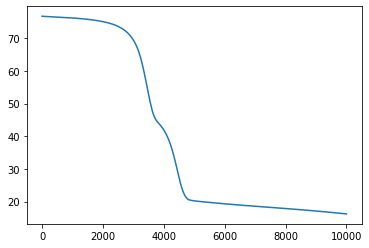

In [12]:
import matplotlib.pyplot as plt
plt.plot(loss_array)
plt.show()